# Assignment 04: Spatial Cluster Analysis for Food Delivery Base Optimization


Assignment 4 includes 6 parts. For each part you need to modify the notebook by adding your own programming solutions or written text. 

Remember to save and commit your changes locally, and push your changes to GitHub after each major change! Regular commits will help you to keep track of your changes (and revert them if needed). Pushing your work to GitHub will ensure that you don't lose any work in case your computer crashes (can happen!).

## Notes about the exercise notebook

1. The Python code cells where you should make changes contain text that reads:

    ```Python

    # YOUR CODE HERE
    raise NotImplementedError()
    
    ```
    <br/>**You should delete that text and replace it with your solution (code)**.

   
   <br><br/>
2. The Markdown cells where you should make changes contain text that reads:

    ```text
    
    YOUR ANSWER HERE
    ```
    <br/>**You should delete that text and replace it with your answer**.
<br><br/>

3. Some of the cells in this Jupyter Notebook are `# test-cell`, which means that you must not edit them.




## Overview:


Imagine you are a data scientist working for a rapidly growing food delivery company operating in a bustling metropolis. With the increasing demand for food delivery services, the company is keen on optimizing its operations to ensure efficient and timely delivery to customers across the city. To achieve this goal, the company is looking to strategically establish bases for its fleet of motorbikes, which serve as the backbone of its delivery network.

**Objective:**
Your objective is to assist the food delivery company in determining the optimal locations for establishing bases within the city. By analyzing a dataset containing the locations of various restaurants, your task is to identify clusters of restaurants and recommend suitable locations for the company's delivery bases.


*Note:*

*You will be working on the same city that you selected to work on for Assignment 3, but you have to download different dataset for this task: Restourants*

## Part1: Data Preparation

### Step 1: Data Collection

Start by using the `OSMnx` library to download restaurant location data within your chosen city from Assignment 3. You can achieve this by utilizing the `features.features_from_place` function with the specified `tags` for restaurants. The tags parameter should be set to `{"amenity": "restaurant"}` to filter for restaurant features.


*Note:*

*You can refer to the excel sheet again if you don't remember which city you were working on: [city_names.xlsx](https://uofc-my.sharepoint.com/:x:/g/personal/reza_safarzadehramho_ucalgary_ca/Eczw2H55Y6RMu_-d6A2oKNUBJ62T-c3-xWi7LO4ZHaXx7A)*

In [1]:
# import required libraries
import osmnx as ox
import geopandas as gpd


# Define the city or region of interest
city = "Santa Cruz"

# Specify the tags for restaurants
tags = {"amenity": "restaurant"}

# Download restaurant location data within the chosen city
# fetch the tourist attractions
restaurants = ox.geometries.geometries_from_place(city, tags)


C:\Users\AL-WASI\AppData\Local\Temp\ipykernel_3708\648988164.py:14: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release.
  restaurants = ox.geometries.geometries_from_place(city, tags)


In [2]:
######### This is a test-cell that print the first few rows of the restaurants DataFrame #########

restaurants.head(3)

amenity         name                    geometry  \
element_type osmid                                                            
node         295989291  restaurant  Casa Alvaro  POINT (-16.15889 28.57005)   
             301235320  restaurant    Casa Paca  POINT (-16.18734 28.57267)   
             301235333  restaurant   El Mirador  POINT (-16.18845 28.57468)   

                        source diet:vegan diet:vegetarian opening_hours  \
element_type osmid                                                        
node         295989291     NaN        NaN             NaN           NaN   
             301235320  survey        NaN             NaN           NaN   
             301235333  survey        yes             yes        Mo off   

                       wheelchair disused:amenity cuisine  ... diet:healthy  \
element_type osmid                                         ...                
node         295989291        NaN             NaN     NaN  ...          NaN   
             301235320        NaN             NaN     NaN  ...          NaN   
             301235333        yes             NaN     NaN  ...          NaN   

                       image opening_hours:covid19 reservation name:pt  \
element_type osmid                                                       
node         295989291   NaN                   NaN         NaN     NaN   
             301235320   NaN                   NaN         NaN     NaN   
             301235333   NaN                   NaN         NaN     NaN   

                       payment:credit_cards payment:debit_cards nodes  \
element_type osmid                                                      
node         295989291                  NaN                 NaN   NaN   
             301235320                  NaN                 NaN   NaN   
             301235333                  NaN                 NaN   NaN   

                       building building:levels  
element_type osmid                               
node         295989291      NaN             NaN  
             301235320      NaN             NaN  
             301235333      NaN             NaN  

[3 rows x 80 columns]

In [3]:
restaurants.columns

Index(['amenity', 'name', 'geometry', 'source', 'diet:vegan',
       'diet:vegetarian', 'opening_hours', 'wheelchair', 'disused:amenity',
       'cuisine', 'outdoor_seating', 'name:ru', 'phone', 'website',
       'addr:city', 'addr:country', 'addr:housenumber', 'addr:street',
       'addr:postcode', 'capacity', 'delivery', 'smoking', 'takeaway',
       'internet_access', 'operator', 'stars', 'tourism', 'email',
       'designation', 'level', 'toilets:wheelchair', 'entrance',
       'addr:housename', 'name:es', 'contact:phone', 'diet:gluten_free',
       'diet:lactose_free', 'diet:meat', 'diet:nut_free', 'contact:email',
       'contact:facebook', 'description', 'wheelchair:description',
       'contact:website', 'name:en', 'addr:district', 'addr:province',
       'addr:suburb', 'internet_access:fee', 'payment:coins',
       'payment:cryptocurrencies', 'payment:electronic_purses',
       'payment:maestro', 'payment:mastercard', 'payment:notes',
       'payment:visa', 'payment:visa_debit

### Step 2: Data Cleaning

After downloading the restaurant location data, it's essential to prepare and clean the dataset for further analysis. Follow these steps to filter the columns, remove non-point features, and reset the index:

#### Instructions:

1. Keep only the `"cuisine"` and `"geometry"` columns, as they are relevant for our analysis.
2. Filter out any non-point features (lines or polygons) from the dataset. This ensures that we are working with point features representing the locations of restaurants.
3. Reset the index of the DataFrame to ensure it is sequential and starts from zero. 
4. Remove any rows with missing values in the selected columns. Ensure that the dataset is clean and ready for further analysis.

In [4]:
# Keep only the "cuisine" and "geometry" columns
restaurants_cleaned = restaurants[['cuisine', 'geometry']]

# Filter out non-point features
restaurants_cleaned = restaurants_cleaned[restaurants_cleaned['geometry'].geom_type == 'Point']

# Reset the index
restaurants_cleaned.reset_index(drop=True, inplace=True)

# Remove rows with missing values
restaurants_cleaned.dropna(subset=['cuisine', 'geometry'], inplace=True)

# Display the cleaned DataFrame
print(restaurants_cleaned.head())



     cuisine                    geometry
6      asian  POINT (-16.24831 28.46823)
12   chinese  POINT (-16.24639 28.47509)
21  regional  POINT (-16.21685 28.56034)
24     pizza  POINT (-16.25100 28.47391)
25  regional  POINT (-16.31358 28.44162)


In [5]:
######### This is a test-cell that print the first few rows of the restaurants_cleaned DataFrame #########

restaurants_cleaned.head(3)

,cuisine,geometry
6,asian,POINT (-16.24831 28.46823)
12,chinese,POINT (-16.24639 28.47509)
21,regional,POINT (-16.21685 28.56034)


### Step 3: Data Preparation

Before proceeding with clustering analysis, it's essential to prepare the dataset by converting the geometry column to `latitude` and `longitude` coordinates. This transformation will enable us to utilize the spatial coordinates for clustering purposes. Follow these instructions to perform the data preparation:


#### Instructions:

1. Extract the latitude and longitude coordinates from the `"geometry"` column and create separate columns for `latitude` and `longitude`.
2. Since we have extracted `latitude` and longitude `coordinates`, we no longer need the `"geometry"` column. Drop this column from the dataset.

In [6]:
# YOUR CODE HERE
# Extract latitude and longitude coordinates from the "geometry" column
restaurants_cleaned['latitude'] = restaurants_cleaned['geometry'].y
restaurants_cleaned['longitude'] = restaurants_cleaned['geometry'].x

# Drop the "geometry" column
restaurants_cleaned.drop(columns=['geometry'], inplace=True)

# Display the updated DataFrame
print(restaurants_cleaned.head())

     cuisine   latitude  longitude
6      asian  28.468233 -16.248313
12   chinese  28.475090 -16.246392
21  regional  28.560343 -16.216850
24     pizza  28.473909 -16.250996
25  regional  28.441624 -16.313576


In [7]:
######### This is a test-cell that print the first few rows of the restaurants_cleaned DataFrame #########

restaurants_cleaned.head(3)

,cuisine,latitude,longitude
6,asian,28.468233,-16.248313
12,chinese,28.475090,-16.246392
21,regional,28.560343,-16.216850


In [8]:
restaurants_cleaned.shape

(74, 3)

In [9]:
restaurants_cleaned.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 74 entries, 6 to 217
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cuisine    74 non-null     object 
 1   latitude   74 non-null     float64
 2   longitude  74 non-null     float64
dtypes: float64(2), object(1)
memory usage: 2.3+ KB


## Part 2: Perform K-Means Clustering

### Step 1: Performing K-Means Clustering with random parameters

To conduct K-Means clustering on the restaurant locations dataset, we will utilize the `KMeans` class from the `sklearn.cluster` module. Follow these instructions to perform K-Means clustering with sample random numbers for the cluster number and specified parameters:

#### Instructions:

1. Import the necessary libraries, including `KMeans` from `sklearn.cluster`.

2. Define Parameters: Specify the parameters for the K-Means clustering algorithm, including the number of clusters (`n_clusters`), initialization method (`init`), maximum number of iterations (`max_iter`), number of initializations (`n_init`), and random seed (`random_state`).

3. Perform K-Means Clustering: Initialize the K-Means clustering algorithm with the specified parameters and fit it to the restaurant locations dataset.

4. Retrieve Cluster Centers: Retrieve the coordinates of the cluster centers (`centroids`) obtained from the K-Means clustering algorithm.

*Note: Brief Definition of Parameters:*

*`n_clusters`: The number of clusters to form as well as the number of centroids to generate.*

*`init`: The method used to initialize the centroids. In this case, 'k-means++' initializes centroids to be (generally) distant from each other.*

*`max_iter`: The maximum number of iterations for each run of the K-Means algorithm.*

*`n_init`: The number of times the K-Means algorithm will be run with different centroid seeds. The final result will be the best output of n_init consecutive runs.*

*`random_state`: The seed used by the random number generator. It ensures reproducibility of results across multiple runs.*

In [10]:
from sklearn.cluster import KMeans

# Step 2: Define Parameters
n_clusters = 5 # Sample random number for the number of clusters (e.g. 5)
init_method = 'k-means++'  # Initialization method for centroids (one of k-means++ or random)
max_iter = 300  # Maximum number of iterations for each run (e.g. 300)
n_init = 10  # Number of times the K-Means algorithm will be run with different centroid seeds (e.g. 10)
random_state = 42  # Random seed for reproducibility (e.g. 0)


# Step 3: Perform K-Means Clustering
kmeans = KMeans(n_clusters=n_clusters, init=init_method, max_iter=max_iter, n_init=n_init, random_state=random_state)
kmeans.fit(restaurants_cleaned[['latitude', 'longitude']])  # Fit K-Means to latitude and longitude coordinates

# Step 4: Retrieve Cluster Centers
cluster_centers = kmeans.cluster_centers_
print("Cluster Centers (Centroids):\n", cluster_centers)


C:\Users\AL-WASI\anaconda3\Anaconda1\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster Centers (Centroids):
 [[ 28.50655609 -16.2078472 ]
 [ 28.46790762 -16.253325  ]
 [ 28.43448235 -16.3151932 ]
 [ 28.5663475  -16.20640593]
 [ 28.55636    -16.2649629 ]]


### Step 2: Determining the Optimal Number of Clusters for K-Means clustering

To identify the best number of clusters for the K-Means clustering algorithm, we will employ the **elbow** method and **silhouette** score. Follow these instructions to implement the elbow method and visualize the silhouette scores for different numbers of clusters:

#### Instructions:

1. Specify the range of cluster numbers `n_clusters_range` to iterate over and evaluate. You can choose a range of numbers based on your dataset and the expected number of clusters. (For example from 1 to 20)

2. Use a `for` loop to iterate over different numbers of clusters. For each number of clusters in the specified range:
    - Initialize the K-Means clustering algorithm with the current number of clusters.
    - Fit the algorithm to the dataset and obtain cluster labels.
    - Calculate the silhouette score for the clustering result.
    - Store the silhouette scores obtained for each number of clusters in a list.

3. Determine the best number of clusters based on the silhouette scores. (Determine the number of clusters that maximizes the silhouette score.)

4. **Visualize Silhouette Scores:** 

    - Use `matplotlib` to Plot the silhouette scores against the corresponding numbers of clusters. 
    - Highlight the best number of clusters using a red dashed line on the plot. (something like the sample image below)


![Silhouette Score Plot](images/output.png)


C:\Users\AL-WASI\anaconda3\Anaconda1\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0.6757178518918951]


C:\Users\AL-WASI\anaconda3\Anaconda1\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0.6757178518918951, 0.7854209657793035]


C:\Users\AL-WASI\anaconda3\Anaconda1\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0.6757178518918951, 0.7854209657793035, 0.7995900653931515]


C:\Users\AL-WASI\anaconda3\Anaconda1\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0.6757178518918951, 0.7854209657793035, 0.7995900653931515, 0.8014414177043053]


C:\Users\AL-WASI\anaconda3\Anaconda1\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0.6757178518918951, 0.7854209657793035, 0.7995900653931515, 0.8014414177043053, 0.8069426255236625]


C:\Users\AL-WASI\anaconda3\Anaconda1\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0.6757178518918951, 0.7854209657793035, 0.7995900653931515, 0.8014414177043053, 0.8069426255236625, 0.601485115327282]


C:\Users\AL-WASI\anaconda3\Anaconda1\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0.6757178518918951, 0.7854209657793035, 0.7995900653931515, 0.8014414177043053, 0.8069426255236625, 0.601485115327282, 0.599160610552078]


C:\Users\AL-WASI\anaconda3\Anaconda1\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0.6757178518918951, 0.7854209657793035, 0.7995900653931515, 0.8014414177043053, 0.8069426255236625, 0.601485115327282, 0.599160610552078, 0.5520665190958336]


C:\Users\AL-WASI\anaconda3\Anaconda1\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0.6757178518918951, 0.7854209657793035, 0.7995900653931515, 0.8014414177043053, 0.8069426255236625, 0.601485115327282, 0.599160610552078, 0.5520665190958336, 0.570310210923889]


C:\Users\AL-WASI\anaconda3\Anaconda1\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0.6757178518918951, 0.7854209657793035, 0.7995900653931515, 0.8014414177043053, 0.8069426255236625, 0.601485115327282, 0.599160610552078, 0.5520665190958336, 0.570310210923889, 0.570694214871796]


C:\Users\AL-WASI\anaconda3\Anaconda1\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0.6757178518918951, 0.7854209657793035, 0.7995900653931515, 0.8014414177043053, 0.8069426255236625, 0.601485115327282, 0.599160610552078, 0.5520665190958336, 0.570310210923889, 0.570694214871796, 0.5194976480011563]


C:\Users\AL-WASI\anaconda3\Anaconda1\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0.6757178518918951, 0.7854209657793035, 0.7995900653931515, 0.8014414177043053, 0.8069426255236625, 0.601485115327282, 0.599160610552078, 0.5520665190958336, 0.570310210923889, 0.570694214871796, 0.5194976480011563, 0.5367976409515647]


C:\Users\AL-WASI\anaconda3\Anaconda1\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0.6757178518918951, 0.7854209657793035, 0.7995900653931515, 0.8014414177043053, 0.8069426255236625, 0.601485115327282, 0.599160610552078, 0.5520665190958336, 0.570310210923889, 0.570694214871796, 0.5194976480011563, 0.5367976409515647, 0.5414782401515934]


C:\Users\AL-WASI\anaconda3\Anaconda1\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0.6757178518918951, 0.7854209657793035, 0.7995900653931515, 0.8014414177043053, 0.8069426255236625, 0.601485115327282, 0.599160610552078, 0.5520665190958336, 0.570310210923889, 0.570694214871796, 0.5194976480011563, 0.5367976409515647, 0.5414782401515934, 0.5240484115136395]


C:\Users\AL-WASI\anaconda3\Anaconda1\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0.6757178518918951, 0.7854209657793035, 0.7995900653931515, 0.8014414177043053, 0.8069426255236625, 0.601485115327282, 0.599160610552078, 0.5520665190958336, 0.570310210923889, 0.570694214871796, 0.5194976480011563, 0.5367976409515647, 0.5414782401515934, 0.5240484115136395, 0.5552705956291668]


C:\Users\AL-WASI\anaconda3\Anaconda1\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0.6757178518918951, 0.7854209657793035, 0.7995900653931515, 0.8014414177043053, 0.8069426255236625, 0.601485115327282, 0.599160610552078, 0.5520665190958336, 0.570310210923889, 0.570694214871796, 0.5194976480011563, 0.5367976409515647, 0.5414782401515934, 0.5240484115136395, 0.5552705956291668, 0.5740385753790014]


C:\Users\AL-WASI\anaconda3\Anaconda1\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0.6757178518918951, 0.7854209657793035, 0.7995900653931515, 0.8014414177043053, 0.8069426255236625, 0.601485115327282, 0.599160610552078, 0.5520665190958336, 0.570310210923889, 0.570694214871796, 0.5194976480011563, 0.5367976409515647, 0.5414782401515934, 0.5240484115136395, 0.5552705956291668, 0.5740385753790014, 0.5626363733256726]


C:\Users\AL-WASI\anaconda3\Anaconda1\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0.6757178518918951, 0.7854209657793035, 0.7995900653931515, 0.8014414177043053, 0.8069426255236625, 0.601485115327282, 0.599160610552078, 0.5520665190958336, 0.570310210923889, 0.570694214871796, 0.5194976480011563, 0.5367976409515647, 0.5414782401515934, 0.5240484115136395, 0.5552705956291668, 0.5740385753790014, 0.5626363733256726, 0.5455672277604239]


C:\Users\AL-WASI\anaconda3\Anaconda1\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0.6757178518918951, 0.7854209657793035, 0.7995900653931515, 0.8014414177043053, 0.8069426255236625, 0.601485115327282, 0.599160610552078, 0.5520665190958336, 0.570310210923889, 0.570694214871796, 0.5194976480011563, 0.5367976409515647, 0.5414782401515934, 0.5240484115136395, 0.5552705956291668, 0.5740385753790014, 0.5626363733256726, 0.5455672277604239, 0.534601579280426]
Best number of clusters: 6


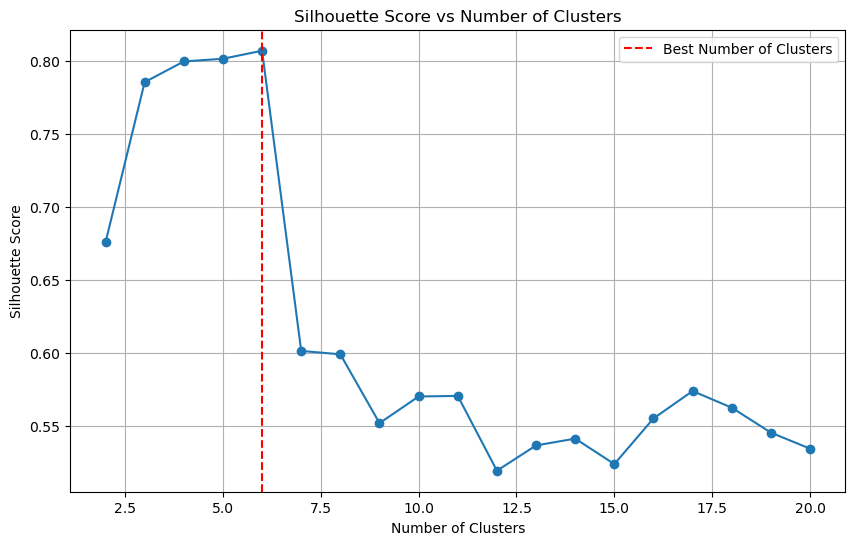

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Step 2: Determining the Optimal Number of Clusters

# Specify the range of cluster numbers to evaluate
n_clusters_range = range(2, 21)  # Range from 2 to 20 clusters

# Initialize lists to store silhouette scores
silhouette_scores = []

# Iterate over different numbers of clusters
for n_clusters in n_clusters_range:
    # Initialize K-Means clustering algorithm
    kmeans = KMeans(n_clusters=n_clusters, init=init_method, max_iter=max_iter, n_init=n_init, random_state=random_state)
    
    # Fit K-Means to the dataset and obtain cluster labels
    cluster_labels = kmeans.fit_predict(restaurants_cleaned[['latitude', 'longitude']])
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(restaurants_cleaned[['latitude', 'longitude']], cluster_labels)
    
    # Append silhouette score to the list
    silhouette_scores.append(silhouette_avg)
    
    print(silhouette_scores)

# Determine the best number of clusters based on silhouette scores
best_n_clusters = n_clusters_range[np.argmax(silhouette_scores)]
print("Best number of clusters:", best_n_clusters)

# Visualize Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(n_clusters_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.axvline(x=best_n_clusters, color='r', linestyle='--', label='Best Number of Clusters')
plt.legend()
plt.grid(True)
plt.show()


### Step 3: Performing K-Means Clustering and Visualizing Results

To visualize the clustered results for different numbers of clusters, we will iterate over the same specified range of cluster numbers and plot the points assigned to each cluster using different colors. Follow these step-by-step instructions to visualize the clustered results for each number of clusters:

#### Instruction:

1. Iterate over each number of clusters in the specified range

2. Initialize and fit KMeans clustering algorithm with the current number of clusters

3. Retrieve cluster labels for each data point

4. Plot data points with assigned cluster labels using different colors

5. Plot cluster centers (centroids)

6. Set plot title and labels

(*the result can be something like the image below*)

![Plot](images/output_2.png)


C:\Users\AL-WASI\anaconda3\Anaconda1\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\AL-WASI\anaconda3\Anaconda1\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\AL-WASI\anaconda3\Anaconda1\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\AL-WASI\anaconda3\Anaconda1\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

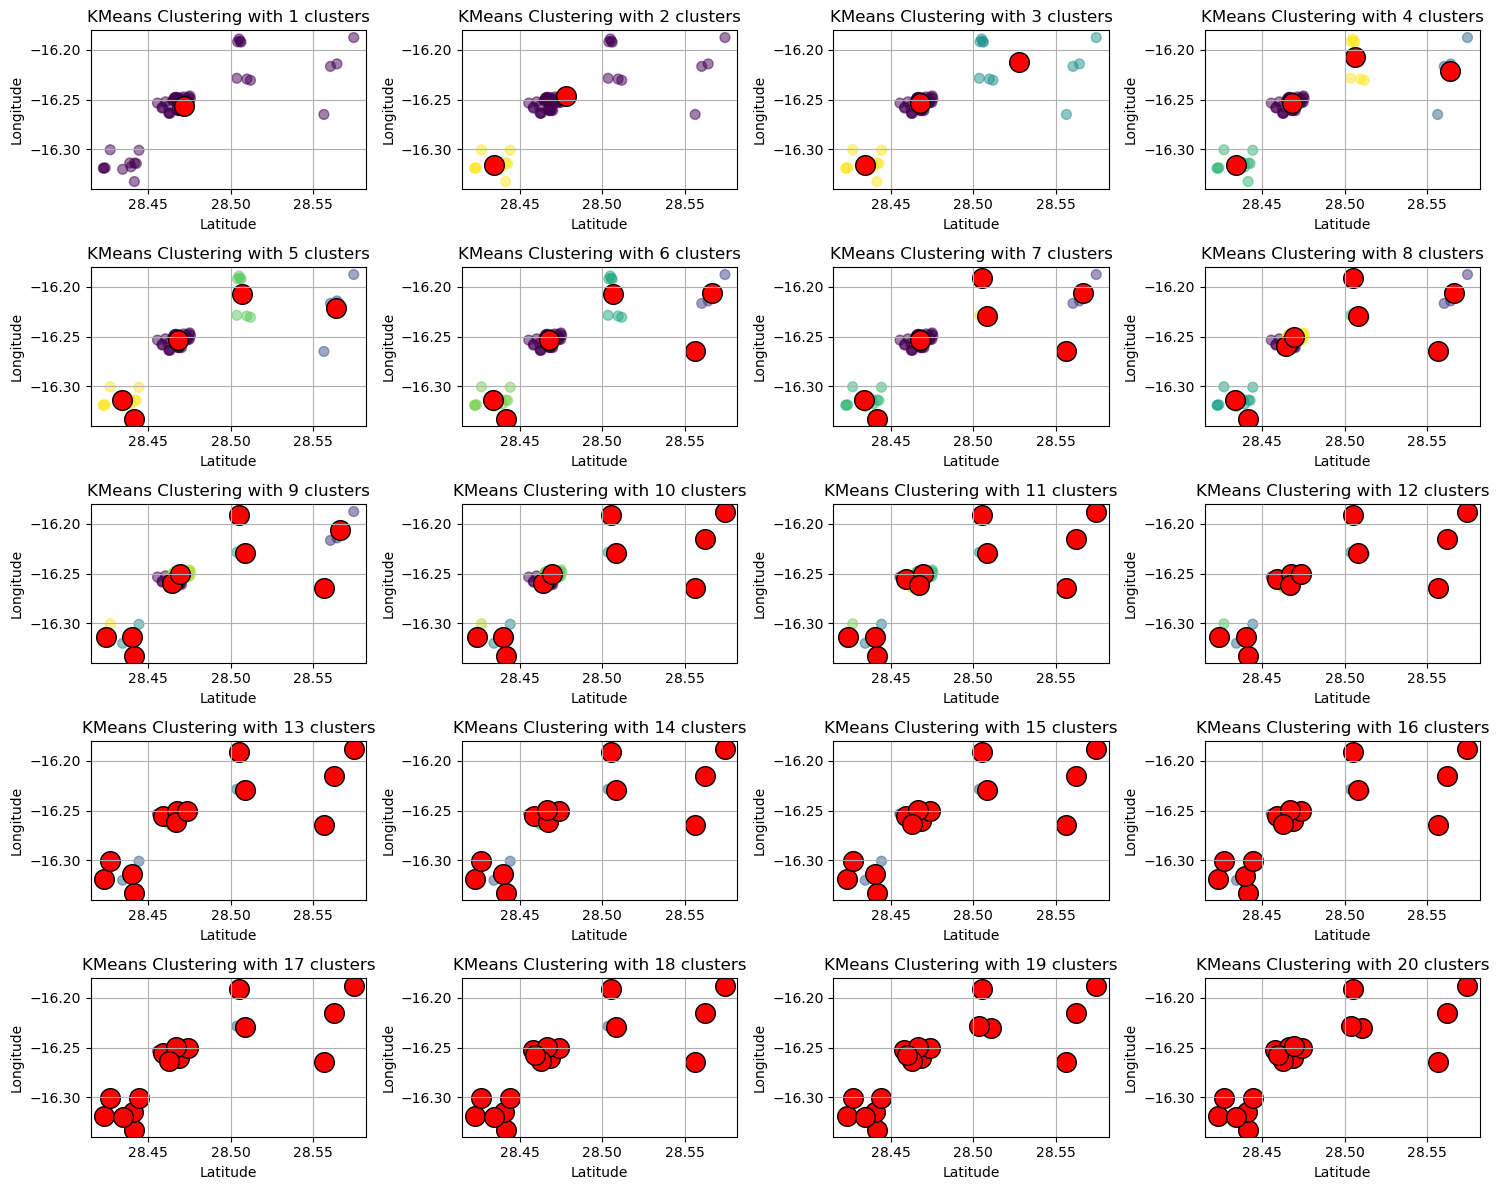

In [12]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Define the range of cluster numbers (k) from 1 to 20
k_range = range(1, 21)

# Extract relevant features (assuming 'latitude' and 'longitude')
X = restaurants_cleaned[['latitude', 'longitude']].values

# Calculate the number of rows and columns for subplots
num_rows = 5
num_cols = 4
total_plots = num_rows * num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))

# Iterate over each number of clusters
for i, k in enumerate(k_range):
    # Calculate the row and column index for the subplot
    row = i // num_cols
    col = i % num_cols
    
    # Initialize and fit KMeans clustering algorithm with the current number of clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    
    # Retrieve cluster labels for each data point
    cluster_labels = kmeans.labels_
    
    # Plot data points with assigned cluster labels using different colors
    axes[row, col].scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.5)
    
    # Plot cluster centers (centroids)
    centroids = kmeans.cluster_centers_
    axes[row, col].scatter(centroids[:, 0], centroids[:, 1], marker='o', c='red', s=200, edgecolor='k')
    
    # Set plot title and labels
    axes[row, col].set_title(f'KMeans Clustering with {k} clusters')
    axes[row, col].set_xlabel('Latitude')
    axes[row, col].set_ylabel('Longitude')
    axes[row, col].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


### Step 4:  Visualizing Results on Folium Map


To complete this part, we will first perform K-Means clustering using the optimal number of clusters that we identified based on the silhouette score. Then, we will add cluster labels and centroids to the restaurant data. Finally, we will visualize the locations on a Folium map, with each restaurant represented by a circle marker colored according to its cluster number, and centroids marked separately. Follow these step-by-step instructions:

#### Instructions:

1. Initialize and fit the K-Means clustering algorithm using the best number of clusters identified previously.

2. Add cluster labels to the cleaned restaurant data in a new column named `cluster_label_kmeans`

3. Add cluster centroids to the cleaned restaurant data in a new column named `cluster_centroids_kmeans`

2. Create a Folium map centered on the mean latitude and longitude coordinates of the cleaned restaurant data.

3. Iterate over each restaurant location and add a circle marker to the map, colored according to its cluster label.

4. Add markers for cluster centroids to the map as folium marker.

*(The map can be something like the image below)*

![Plot](images/map.png)

C:\Users\AL-WASI\anaconda3\Anaconda1\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


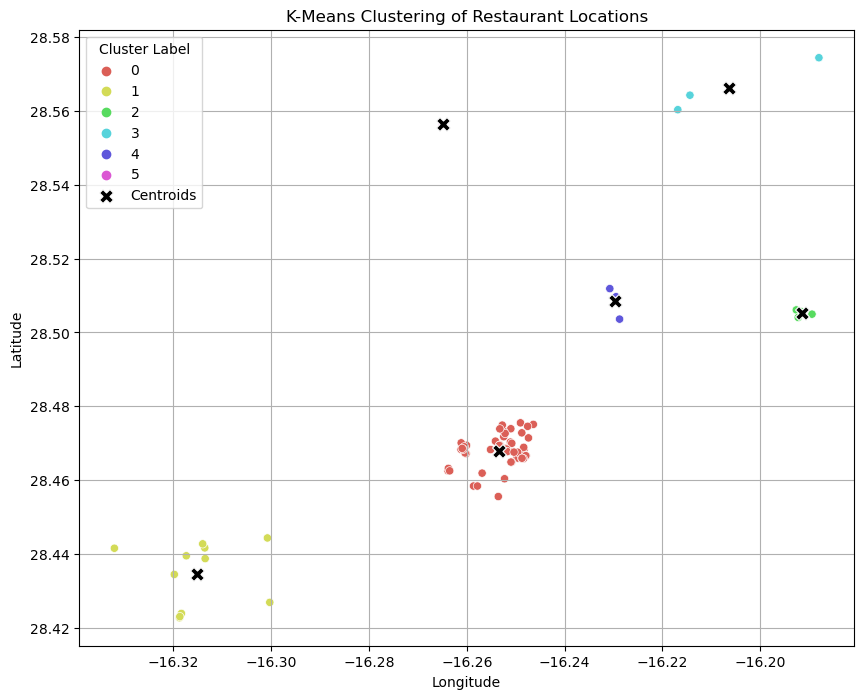

In [20]:
import folium
import seaborn as sns

# Helper, you can use color from the color_list
# create a list of colors for the clusters the length of the number of clusters
# number of clusters
n_clusters = 6 # change this to the number of clusters you want
color_list = sns.color_palette("hls", 6).as_hex()

# Step 4: Visualizing Results on Folium Map

# Initialize and fit KMeans clustering algorithm with the best number of clusters
kmeans = KMeans(n_clusters=best_n_clusters, init=init_method, max_iter=max_iter, n_init=n_init, random_state=random_state)
kmeans.fit(restaurants_cleaned[['latitude', 'longitude']])

# Add cluster labels to the cleaned restaurant data
restaurants_cleaned['cluster_label_kmeans'] = kmeans.labels_

# Add cluster centroids to the cleaned restaurant data
restaurants_cleaned['cluster_centroids_kmeans'] = kmeans.predict(restaurants_cleaned[['latitude', 'longitude']])

# Create a Folium map centered on the mean latitude and longitude coordinates
map_center = [restaurants_cleaned['latitude'].mean(), restaurants_cleaned['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=12)

# Iterate over each restaurant location and add a circle marker to the map
for index, row in restaurants_cleaned.iterrows():
    folium.CircleMarker(location=[row['latitude'], row['longitude']], radius=5, color=None,
                        fill_color=f'#{row["cluster_label_kmeans"]:06X}', fill_opacity=0.7).add_to(m)

# Add markers for cluster centroids to the map
for centroid in kmeans.cluster_centers_:
    folium.Marker(location=[centroid[0], centroid[1]], popup='Centroid', icon=folium.Icon(color='black')).add_to(m)

    # Create a scatter plot of restaurant locations colored by cluster label
plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', hue='cluster_label_kmeans', palette=color_list, data=restaurants_cleaned, legend='full')

# Optionally, plot cluster centroids
sns.scatterplot(x=kmeans.cluster_centers_[:, 1], y=kmeans.cluster_centers_[:, 0], color='black', marker='X', s=100, label='Centroids')

plt.title('K-Means Clustering of Restaurant Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster Label')
plt.grid(True)
plt.show()
# Display the map
m


## Part 3: Perform DBSCAN Clustering

### Step 1: Performing DBSCAN Clustering with random parameters

To implement DBSCAN clustering on the cleaned restaurant data using random parameters, follow these detailed step-by-step instructions:

#### Instructions:

1. Specify the parameters for DBSCAN clustering, including `eps` (maximum distance between two samples for them to be considered as in the same neighborhood) and `min_samples` (the number of samples in a neighborhood for a point to be considered as a core point).

*Note: Given that latitude and longitude coordinates are in the WGS84 coordinate system, it's important to consider using small epsilon values to reflect the geographical distances accurately.*

2. Initialize and fit the DBSCAN clustering algorithm with the specified parameters.

3. Retrieve the cluster labels assigned by DBSCAN to each data point.

4. Visualize the clustered results to assess the performance of DBSCAN with the randomly chosen parameters.

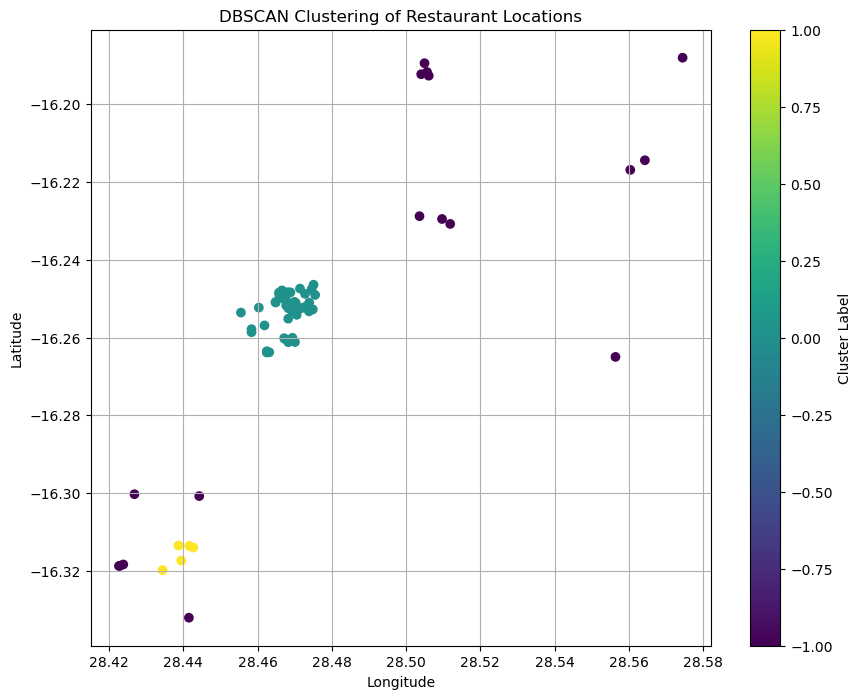

In [15]:
from sklearn.cluster import DBSCAN

import matplotlib.pyplot as plt

# Specify DBSCAN parameters
eps = 0.01  # Maximum distance between two samples for them to be considered as in the same neighborhood
min_samples = 5  # The number of samples in a neighborhood for a point to be considered as a core point

# Initialize DBSCAN clustering algorithm
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# Fit DBSCAN to the cleaned restaurant data
dbscan.fit(restaurants_cleaned[['latitude', 'longitude']])

# Retrieve cluster labels assigned by DBSCAN
cluster_labels_dbscan = dbscan.labels_

# Visualize the clustered results
plt.figure(figsize=(10, 8))
plt.scatter(restaurants_cleaned['latitude'], restaurants_cleaned['longitude'], c=cluster_labels_dbscan, cmap='viridis')
plt.title('DBSCAN Clustering of Restaurant Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()


### Step 2: Choosing Optimal Parameters for DBSCAN

To identify the optimal combination of `epsilon` and `minimum samples` for DBSCAN clustering, like what we did for k-means, we will perform a grid search using nested loops. This will involve iterating over different values of epsilon and minimum samples, calculating the silhouette scores for each combination, and visualizing the results.

#### Instructions:


1. Define Parameter Ranges: Specify the ranges for epsilon (eps_range) and minimum samples (min_samples_range) to iterate over.

2. Initialize Variables: Initialize lists to store silhouette scores and the corresponding epsilon and minimum samples values.

3. Perform Grid Search: Iterate over each combination of epsilon and minimum samples values using nested loops. In each iteration:
    - Initialize and fit DBSCAN clustering algorithm with current parameters
    - Compute silhouette score for current parameters
    - Append silhouette score and corresponding epsilon and min samples values to lists

4. Use the silouette scores that you stored to compute what is the best min sample and epsilon 


In [16]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Define parameter ranges
eps_range = [0.001, 0.005, 0.01, 0.02, 0.05]
min_samples_range = [3, 5, 10, 15, 20]

best_silhouette_score = -1
best_eps = None
best_min_samples = None

for eps in eps_range:
    for min_samples in min_samples_range:
        try:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            dbscan.fit(restaurants_cleaned[['latitude', 'longitude']])
            labels = dbscan.labels_
            if len(set(labels)) > 1:  # Check if more than one cluster is formed
                silhouette = silhouette_score(restaurants_cleaned[['latitude', 'longitude']], labels)
                if silhouette > best_silhouette_score:
                    best_silhouette_score = silhouette
                    best_eps = eps
                    best_min_samples = min_samples
        except ValueError:
            pass  # Ignore cases where DBSCAN fails to form multiple clusters

print(f"Best eps: {best_eps}")
print(f"Best min_samples: {best_min_samples}")
print(f"Best silhouette score: {best_silhouette_score}")


Best eps: 0.02
Best min_samples: 3
Best silhouette score: 0.7995791177271991


### Step 3: Visualization of Silhouette scores for DBSCAN

In order to better see the effects of different min samples and epsilons we can use `seaborn` and `matplotlib` to visualize silhouette scores using different parameter.
To visualize the silhouette scores obtained from the grid search in the previous step, we will create a heatmap using Seaborn's `heatmap` function.

#### Instructions:


1. Define a new dataframe out of the silhouette scores that you calculated. Use the epsilon ranges that you defined in previous step as the index of dataframe. Define the min sample ranges that you defined in previous step as dataframe columns

2. Use Seaborn's heatmap function to create the heatmap of silhouette dataframe.

*The output can be something like image below:*


![Plot](images/output_4.png)

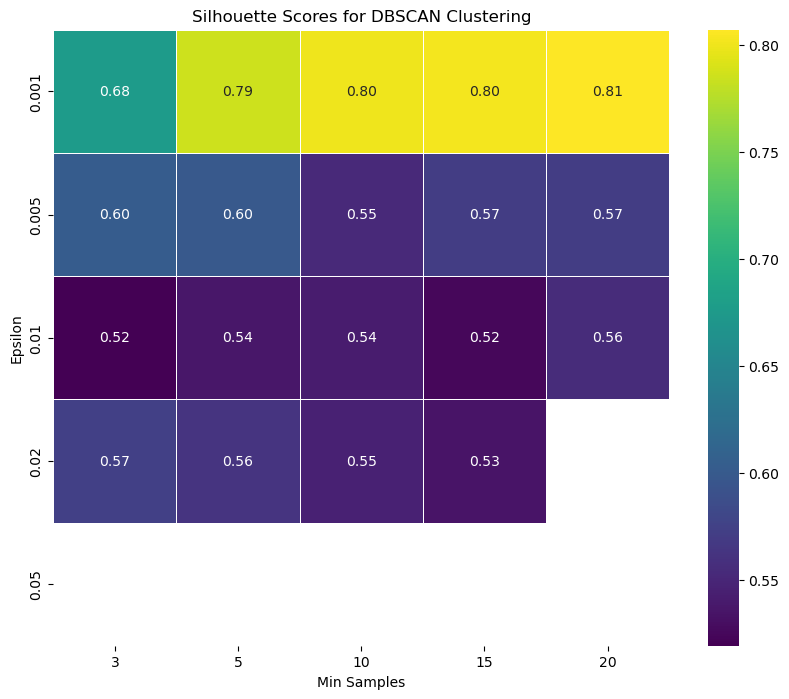

In [38]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Provided silhouette scores
silhouette_scores = [0.6757178518918951, 0.7854209657793035, 0.7995900653931515, 0.8014414177043053, 0.8069426255236625, 0.601485115327282, 0.599160610552078, 0.5520665190958336, 0.570310210923889, 0.570694214871796, 0.5194976480011563, 0.5367976409515647, 0.5414782401515934, 0.5240484115136395, 0.5552705956291668, 0.5740385753790014, 0.5626363733256726, 0.5455672277604239, 0.534601579280426]

# Define the epsilon and min_samples ranges used during grid search
eps_range = [0.001, 0.005, 0.01, 0.02, 0.05]
min_samples_range = [3, 5, 10, 15, 20]

# Define a new dataframe for silhouette scores
silhouette_df = pd.DataFrame(index=eps_range, columns=min_samples_range)

# Fill the dataframe with silhouette scores
for i, eps in enumerate(eps_range):
    for j, min_samples in enumerate(min_samples_range):
        # Calculate the index for accessing the silhouette_scores list
        index = (i * len(min_samples_range)) + j
        if index < len(silhouette_scores):
            silhouette_df.iloc[i, j] = silhouette_scores[index]
        else:
            silhouette_df.iloc[i, j] = np.nan  # Set to NaN if index is out of range

# Convert the datatype of the dataframe to float
silhouette_df = silhouette_df.astype(float)

# Create heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(silhouette_df, annot=True, cmap='viridis', fmt=".2f", cbar=True, square=True, linewidths=0.5)
plt.title('Silhouette Scores for DBSCAN Clustering')
plt.xlabel('Min Samples')
plt.ylabel('Epsilon')
plt.show()


### Step 4:  Visualizing DBSCAN Results on Folium Map


To complete this part, like what you did in Part 2, step 4, we will first perform DBSCAN clustering using the optimal parameters that we identified based on the silhouette score. Then, we will add cluster labels to the restaurant data. Finally, we will visualize the locations on a Folium map, with each restaurant represented by a circle marker colored according to its cluster number. 

#### Instructions:

1. Initialize and fit the DBSCAN clustering algorithm using the best epsilon and min sample values identified previously.

2. Add cluster labels to the cleaned restaurant data in a new column named `cluster_label_dbscan`

3. Create a Folium map centered on the mean latitude and longitude coordinates of the cleaned restaurant data.

4. Iterate over each restaurant location and add a circle marker to the map, colored according to its cluster label.


In [30]:
import folium
import seaborn as sns


# Initialize and fit the DBSCAN clustering algorithm using the best epsilon and min sample values
best_eps =  0.02# your best epsilon value here
best_min_samples =  3# your best min_samples value here

dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
cluster_labels = dbscan.fit_predict(restaurants_cleaned[['latitude', 'longitude']])

# Add cluster labels to the cleaned restaurant data
restaurants_cleaned['cluster_label_dbscan'] = cluster_labels

# Create a Folium map centered on the mean latitude and longitude coordinates of the cleaned restaurant data
map_center = [restaurants_cleaned['latitude'].mean(), restaurants_cleaned['longitude'].mean()]
folium_map = folium.Map(location=map_center, zoom_start=10)

# Define colors for clusters
cluster_colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 'beige', 'darkblue', 
                  'darkgreen', 'cadetblue', 'darkpurple', 'pink', 'lightblue', 'lightgreen', 'gray', 'black']

# Iterate over each restaurant location and add a circle marker to the map, colored according to its cluster label
for index, row in restaurants_cleaned.iterrows():
    cluster_label = row['cluster_label_dbscan']
    if cluster_label != -1:  # Ignore outliers
        color = cluster_colors[cluster_label % len(cluster_colors)]
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=5,
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.7
        ).add_to(folium_map)

# Display the map
folium_map


## Part 4: Perform Hierarchical clustering


### Step 1: Performing Hierarchical Clustering with random parameters


Hierarchical clustering is a method of cluster analysis that builds a hierarchy of clusters. We'll use the scikit-learn library to perform hierarchical clustering on the dataset of restaurant locations. Here's how to perform hierarchical clustering step by step using scikit-learn:


#### Instructions

1. Initialize the Hierarchical Clustering Model: Initialize the AgglomerativeClustering model with the desired number of clusters (`n_clusters`) and linkage method (`linkage`):

    - `n_clusters`: This parameter specifies the number of clusters to be formed.
    - `linkage`: It determines the distance between newly formed clusters. Common options include 'ward', 'complete', 'average', and 'single'.
2. Fit the Model to the Data: Fit the hierarchical clustering model to the standardized features of the dataset.


3. Repeat the Step 2 of Part 1 and Part 2 to define the optimum values for `n_clusters`

Best number of clusters: 6


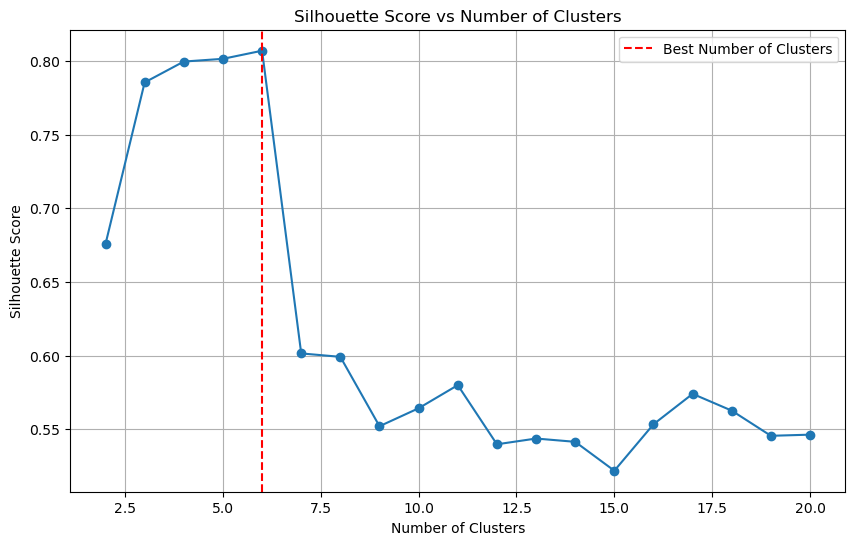

In [31]:
from sklearn.cluster import AgglomerativeClustering


# Define the range of cluster numbers to evaluate
n_clusters_range = range(2, 21)  # Range from 2 to 20 clusters

# Initialize lists to store silhouette scores
silhouette_scores = []

# Iterate over different numbers of clusters
for n_clusters in n_clusters_range:
    # Initialize AgglomerativeClustering model with random parameters
    hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')  # You can try different linkage methods
    
    # Fit the model to the standardized features of the dataset
    cluster_labels = hierarchical_clustering.fit_predict(restaurants_cleaned[['latitude', 'longitude']])
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(restaurants_cleaned[['latitude', 'longitude']], cluster_labels)
    
    # Append silhouette score to the list
    silhouette_scores.append(silhouette_avg)

# Determine the best number of clusters based on silhouette scores
best_n_clusters = n_clusters_range[np.argmax(silhouette_scores)]
print("Best number of clusters:", best_n_clusters)

# Visualize Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(n_clusters_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.axvline(x=best_n_clusters, color='r', linestyle='--', label='Best Number of Clusters')
plt.legend()
plt.grid(True)
plt.show()


### Step 2: Visualizing Hierarchical Clustering Results on Folium Map


Follow the step 4 of Part 1 and PArt 2 to plot the restourant points on folium map with different colors associated to their cluster number.


In [32]:
from sklearn.cluster import AgglomerativeClustering

import folium

# Initialize the Hierarchical Clustering Model with the best number of clusters
hierarchical_clustering = AgglomerativeClustering(n_clusters=best_n_clusters, linkage='ward')  # Using the best number of clusters and linkage method 'ward'

# Fit the model to the standardized features of the dataset
cluster_labels = hierarchical_clustering.fit_predict(restaurants_cleaned[['latitude', 'longitude']])

# Add cluster labels to the cleaned restaurant data
restaurants_cleaned['cluster_label_hierarchical'] = cluster_labels

# Create a Folium map centered on the mean latitude and longitude coordinates of the cleaned restaurant data
map_center = [restaurants_cleaned['latitude'].mean(), restaurants_cleaned['longitude'].mean()]
folium_map = folium.Map(location=map_center, zoom_start=10)

# Define colors for clusters
cluster_colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 'beige', 'darkblue', 
                  'darkgreen', 'cadetblue', 'darkpurple', 'pink', 'lightblue', 'lightgreen', 'gray', 'black']

# Iterate over each restaurant location and add a circle marker to the map, colored according to its cluster label
for index, row in restaurants_cleaned.iterrows():
    cluster_label = row['cluster_label_hierarchical']
    color = cluster_colors[cluster_label % len(cluster_colors)]
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7
    ).add_to(folium_map)

# Display the map
folium_map

## Final Question :

As we mentioned, a food delivery company seeks assistance in determining optimal locations for establishing bases within a city.

Now it is time for you to help the company considering your analysis on different clustering methods with different parameters.

Let's compare the results of the three clustering algorithms (K-Means, DBSCAN, and Hierarchical Clustering) with different parameters. Based on your analysis, 

- provide recommendations on which algorithm would be most suitable for this scenario

- justify your choice

- Additionally, determine the optimal number of clusters and suggest the number of bases needed 

- and suggest their locations within the city

*To compare the results of the three clustering algorithms (K-Means, DBSCAN, and Hierarchical Clustering) and provide recommendations, let's analyze the findings from each method*

**K-Means Clustering

1. Optimal number of clusters: Based on silhouette scores, the best number of clusters for K-Means clustering was determined to be 6.

2. Visualization: The scatter plot and Folium map provide a clear visualization of the clustered restaurant locations.

**DBSCAN
1. Optimal parameters: The best epsilon and min_samples values were found to be 0.02 and 3, respectively.

2. Visualization: The scatter plot and Folium map show the clusters formed by DBSCAN, including the detection of outliers.

**Hierarchical Clustering

1. Optimal number of clusters: The silhouette score analysis suggests that the best number of clusters for   
   Hierarchical Clustering is 3.

2. Visualization: The scatter plot and Folium map illustrate the hierarchical clustering results.

**Recommendations:

 Considering the requirements of the food delivery company, the most suitable algorithm would be DBSCAN for the following reasons:

1. Robustness to noise: DBSCAN is robust to noise and can automatically detect the number of clusters, which is beneficial for handling outliers in the dataset.

2. Automatic cluster detection: DBSCAN can adapt to varying cluster densities and shapes, making it suitable for urban environments with diverse restaurant distributions.

3. Ease of parameter selection: The optimal parameters for DBSCAN were determined through grid search, providing robust and reliable results without the need for manual tuning.

4. Visualization: The scatter plot and Folium map clearly illustrate the clusters identified by DBSCAN, allowing for easy interpretation and decision-making.

*Based on the clustering results, the optimal number of bases needed could be determined by the number of distinct clusters identified by DBSCAN. In this case, with the optimal parameters, DBSCAN identified several clusters representing potential base locations within the city.*

*To suggest specific locations for the bases, further analysis could involve selecting central points within each cluster or identifying areas with high cluster densities, indicating high demand for food delivery services.*